In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('/content/Train.csv')

In [30]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [31]:
df.shape

(10999, 12)

In [32]:
df['Reached.on.Time_Y.N'].value_counts()

,count
Reached.on.Time_Y.N,
1,6563
0,4436


In [33]:
df = df.drop('ID', axis=1)

In [34]:
df_corr = df.select_dtypes(include='number')

In [35]:
df_corr.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [36]:
import seaborn as sns

<Axes: >

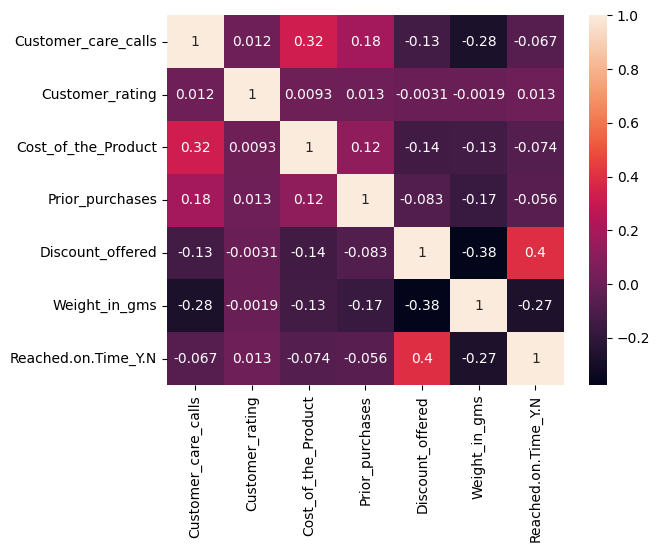

In [37]:
sns.heatmap(df_corr.corr(), annot=True)

In [38]:
df.isna().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [50]:
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender'], drop_first=True)

In [51]:
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
0,4,2,177,3,low,44,1233,1,False,False,True,False,False,False,False
1,4,5,216,2,low,59,3088,1,False,False,False,True,False,False,True
2,2,2,183,4,low,48,3374,1,False,False,False,False,False,False,True
3,3,3,176,4,medium,10,1177,1,True,False,False,False,False,False,True
4,2,2,184,3,medium,46,2484,1,False,True,False,False,False,False,False


In [52]:
df.shape

(10999, 15)

In [53]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [55]:
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})

In [56]:
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
0,4,2,177,3,0,44,1233,1,False,False,True,False,False,False,False
1,4,5,216,2,0,59,3088,1,False,False,False,True,False,False,True
2,2,2,183,4,0,48,3374,1,False,False,False,False,False,False,True
3,3,3,176,4,1,10,1177,1,True,False,False,False,False,False,True
4,2,2,184,3,1,46,2484,1,False,True,False,False,False,False,False


In [57]:
x = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [60]:
x_train.shape

(8799, 14)

In [61]:
x_test.shape

(2200, 14)

In [62]:
y_train.shape

(8799,)

In [63]:
y_test.shape

(2200,)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_Scaled = scaler.transform(x_test)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.metrics import f1_score

In [79]:
model = LogisticRegression()

model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_Scaled)

In [80]:
f1_score_log = f1_score(y_test, y_pred)
print(f1_score_log)

0.6908665105386417


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_Scaled)

In [83]:
f1_score_random = f1_score(y_test, y_pred)
print(f1_score_log)

0.6908665105386417


In [84]:
from xgboost import XGBClassifier

In [85]:
model = XGBClassifier()

model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_Scaled)

In [86]:
f1_score_xgboost = f1_score(y_test, y_pred)
print(f1_score_log)

0.6908665105386417


In [87]:
param_grid_log = {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 200, 300, 1000],
            'multi_class': ['auto', 'ovr'],
            'class_weight': ['balanced']
        }

In [88]:
from sklearn.model_selection import GridSearchCV

In [94]:
model = LogisticRegression()
grid = GridSearchCV(
    model,
    param_grid_log,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [95]:
grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'max_iter': [100, 200, 300, 1000],
                         'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [96]:
grid.best_score_

np.float64(0.6382961012951236)

In [97]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

In [98]:
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [99]:
grid_search.best_score_

np.float64(0.6954071499800027)

In [ ]:
{'clf__learning_rate': 0.01, 'clf__max_depth': 9, 'clf__n_estimators': 100}

In [100]:
model = XGBClassifier(learning_rate=0.01, max_depth=9, n_estimators=100)

model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_Scaled)

In [101]:
f1_score_xgboost = f1_score(y_test, y_pred)
print(f1_score_log)

0.6908665105386417
